In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# preprocess data, load read count, do normalization
A = pd.read_table('RC.txt', header=None)

# normalizing the read counts into TPM (transcript per million)
TotalRead = A.sum()
A_TPM = np.zeros_like(A)

for i in range(1,A.shape[1]):
    A_TPM[:,i] = A.iloc[:,i]*1000000000 / TotalRead[i] 
A_TPM[:,0]=A.iloc[:,0]

#np.savetxt('TPM.txt', A_TPM[:,1:], delimiter='\t', fmt='%1.3f')

In [3]:
# after annotating the normalized TPM matrix, load in data and annotations of GBM9, for differential gene expression analysis
gbm = pd.read_table('GBM9.sc.txt')

s1 = gbm.iloc[:,1:30]
s2 = gbm.iloc[:,30:90]
s3 = gbm.iloc[:,90:]

In [4]:
# assign individual cells to three different tumors
name = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]

In [11]:
# compare each two groups of single cells for differential gene expression (ranksum's test)
from scipy.stats import ranksums
import xlsxwriter 

shape = gbm.shape[0]
workbook = xlsxwriter.Workbook("S1_S2.ranksums.xlsx")
worksheet = workbook.add_worksheet()
row = 0
s12 = []
for i in range(shape):
    gene = gbm.iloc[i,0]
    s,p = ranksums(s1.iloc[i,:], s2.iloc[i,:])
    if p < 0.01:
        s12.append(gene)
        worksheet.write(row, 0, gene)
        worksheet.write(row, 1, s)
        worksheet.write(row, 2, p)
        row += 1
    if i % 10000 == 0:
        print ("Progress:", i, "out of", shape)
workbook.close() 

workbook = xlsxwriter.Workbook("S1_S3.ranksums.xlsx")
worksheet = workbook.add_worksheet()
row = 0
s13 = []
for i in range(shape):
    gene = gbm.iloc[i,0]
    s,p = ranksums(s1.iloc[i,:], s3.iloc[i,:])
    if p < 0.01:
        s13.append(gene)
        worksheet.write(row, 0, gene)
        worksheet.write(row, 1, s)
        worksheet.write(row, 2, p)
        row += 1
    if i % 10000 == 0:
        print ("Progress:", i, "out of", shape)
workbook.close() 

Progress: 0 out of 56638
Progress: 10000 out of 56638
Progress: 20000 out of 56638
Progress: 30000 out of 56638
Progress: 40000 out of 56638
Progress: 50000 out of 56638
Progress: 0 out of 56638
Progress: 10000 out of 56638
Progress: 20000 out of 56638
Progress: 30000 out of 56638
Progress: 40000 out of 56638
Progress: 50000 out of 56638


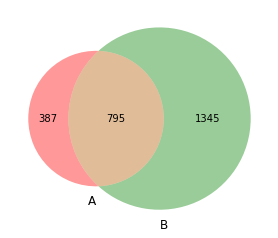

In [20]:
from matplotlib_venn import venn2

same = len(set(s12)&set(s13))
uniq_1 = len(set(s12)-set(s13))
uniq_2 = len(set(s13)-set(s12))

venn2(subsets = (same, uniq_1, uniq_2))

In [22]:
print (set(s12)-set(s13))

{'ATP10A', 'RABL5', 'CAPZB', 'NDUFB1', 'MFSD2A', 'PSMC4', 'LHFP', 'DHRS7', 'UNC80', 'ZNF841', 'TNFRSF19', 'NDUFB7', 'CUL5', 'RPL24P4', 'RPL7P23', 'SMG5', 'RPL18A', 'C9orf152', 'CUL3', 'C18orf25', 'RP11-673C5.1', 'EIF4G1', 'HDAC9', 'LYSMD1', 'FTSJ3', 'EPB41L5', 'USP15', 'GNG5', 'MIR22HG', 'PFN1', 'LINC01128', 'NAMPT', 'IGSF11', 'PCDH17', 'MMP1', 'TMEM14A', 'CD44', 'M6PR', 'UBBP4', 'STOM', 'ZFYVE26', 'VPS53', 'NOL3', 'PRRC2C', 'RPL8', 'ZNF254', 'B4GALT1', 'IFIT5', 'PSMA2', 'WDR43', 'TMCO3', 'S1PR3', 'CS', 'QKI', 'PLSCR1', 'UGCG', 'WTAP', 'RP11-425L10.1', 'NR2C2', 'EPT1', 'ATP13A3', 'TBCAP1', 'TNFAIP3', 'RP11-48B3.4', 'HIVEP2', 'EDEM1', 'FABP5P11', 'DMWD', 'GPC6', 'TCHP', 'EIF6', 'C3orf17', 'CD82', 'BTBD3', 'TNKS2', 'C6orf62', 'SLITRK2', 'RASAL2', 'RP11-798M19.6', 'EIF3K', 'FBN2', 'NFE2L3', 'PFN1P1', 'DDX58', 'COLGALT2', 'IFI44', 'MAPK1IP1L', 'SATB2', 'AC007969.5', 'CHCHD2P2', 'DDX3X', 'EEF1A1P5', 'MPRIP', 'CPNE8', 'RPL37A', 'CNR1', 'LRRTM4', 'DYNLL1', 'ARSB', 'WDR75', 'RPL5P4', 'FAM103A2